capital gain: return due to the change of asset value 


holding period gain: final price - original price + other period gain


holding period return = holding period gain / original price


holding period net return = holding period gain - sell trade expense / original price + buy trade expense 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stock = pd.read_csv('018/stockszA.csv',index_col='Trddt')


In [3]:
stock.head()

,Stkcd,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,Dretwd,Dretnd,Adjprcwd,Adjprcnd,Markettype,Capchgdt,Trdsta
Trddt,,,,,,,,,,,,,,,,
2014/1/2,1,12.12,12.30,12.05,12.23,48991089,596223744.4,68193279.93,1.002537e+08,-0.001633,-0.001633,686.893127,586.277691,4,2013/11/12,1
2014/1/3,1,12.15,12.16,11.78,11.93,55111484,656631302.4,66520509.37,9.779451e+07,-0.024530,-0.024530,670.043745,571.896390,4,2013/11/12,1
2014/1/6,1,11.89,12.00,11.50,11.67,58211823,679280389.7,65070774.88,9.566320e+07,-0.021794,-0.021794,655.440948,559.432596,4,2013/11/12,1
2014/1/7,1,11.53,11.76,11.51,11.63,33840749,393977581.0,64847738.81,9.533530e+07,-0.003428,-0.003428,653.194364,557.515089,4,2013/11/12,1
2014/1/8,1,11.64,11.95,11.53,11.76,45776816,538436179.5,65572606.05,1.119640e+08,0.011178,0.011178,660.495763,563.746986,4,2014/1/8,1


In [5]:
Vanke = stock[stock.Stkcd == 2]
close = Vanke.Clsprc

In [6]:
close.head()

Trddt
2014/1/2    7.99
2014/1/3    7.84
2014/1/6    7.48
2014/1/7    7.43
2014/1/8    7.42
Name: Clsprc, dtype: float64

In [7]:
close.index = pd.to_datetime(close.index)

In [8]:
close.index.name = 'date'

In [9]:
close.head()

date
2014-01-02    7.99
2014-01-03    7.84
2014-01-06    7.48
2014-01-07    7.43
2014-01-08    7.42
Name: Clsprc, dtype: float64

In [10]:
lag_close = close.shift(1) # 将收盘价格向后移动一天
lag_close.head()

date
2014-01-02     NaN
2014-01-03    7.99
2014-01-06    7.84
2014-01-07    7.48
2014-01-08    7.43
Name: Clsprc, dtype: float64

In [11]:
CalClose = pd.DataFrame({'close':close,'lag_close':lag_close})

In [12]:
CalClose.head()

,close,lag_close
date,,
2014-01-02,7.99,NaN
2014-01-03,7.84,7.99
2014-01-06,7.48,7.84
2014-01-07,7.43,7.48
2014-01-08,7.42,7.43


In [13]:
simpleret = (close - lag_close)/lag_close # 计算简单收益率
simpleret.name = 'simpleret'

In [14]:
simpleret.head()


date
2014-01-02         NaN
2014-01-03   -0.018773
2014-01-06   -0.045918
2014-01-07   -0.006684
2014-01-08   -0.001346
Name: simpleret, dtype: float64

In [15]:
calret = pd.merge(CalClose,pd.DataFrame(simpleret),left_index=True,right_index=True)

In [16]:
calret.head()

,close,lag_close,simpleret
date,,,
2014-01-02,7.99,NaN,NaN
2014-01-03,7.84,7.99,-0.018773
2014-01-06,7.48,7.84,-0.045918
2014-01-07,7.43,7.48,-0.006684
2014-01-08,7.42,7.43,-0.001346


In [17]:
simpleret2 = (close - close.shift(2))/close.shift(2) # 计算2期简单收益率
simpleret2.name = 'simpleret2'
calret['simpleret2'] = simpleret2
calret.head()

,close,lag_close,simpleret,simpleret2
date,,,,
2014-01-02,7.99,NaN,NaN,NaN
2014-01-03,7.84,7.99,-0.018773,NaN
2014-01-06,7.48,7.84,-0.045918,-0.063830
2014-01-07,7.43,7.48,-0.006684,-0.052296
2014-01-08,7.42,7.43,-0.001346,-0.008021


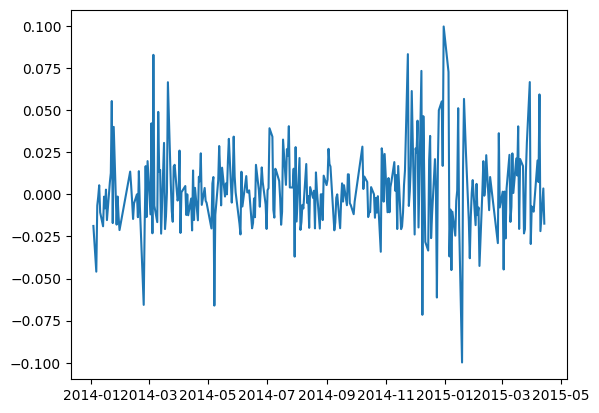

In [18]:
plt.plot(calret.simpleret)

In [19]:
calret.iloc[5,:]

close         7.460000
lag_close     7.420000
simpleret     0.005391
simpleret2    0.004038
Name: 2014-01-09 00:00:00, dtype: float64

In [20]:
calret.loc['2014-01-09',:]

close         7.460000
lag_close     7.420000
simpleret     0.005391
simpleret2    0.004038
Name: 2014-01-09 00:00:00, dtype: float64

In [22]:
import ffn
ffnSimpleret = ffn.to_returns(close)
ffnSimpleret.name = 'ffnSimpleret'
ffnSimpleret.head()

date
2014-01-02         NaN
2014-01-03   -0.018773
2014-01-06   -0.045918
2014-01-07   -0.006684
2014-01-08   -0.001346
Name: ffnSimpleret, dtype: float64

In [23]:
# 计算单期连续复利收益率
logret = np.log(close) - np.log(lag_close)
logret.name = 'logret'
logret.head()

date
2014-01-02         NaN
2014-01-03   -0.018952
2014-01-06   -0.047006
2014-01-07   -0.006707
2014-01-08   -0.001347
Name: logret, dtype: float64

In [24]:
ffnlogret = ffn.to_log_returns(close)
ffnlogret.name = 'ffnlogret'
ffnlogret.head()

date
2014-01-02         NaN
2014-01-03   -0.018952
2014-01-06   -0.047006
2014-01-07   -0.006707
2014-01-08   -0.001347
Name: ffnlogret, dtype: float64

In [25]:
# 计算2期连续复利收益率
logret2 = np.log(close) - np.log(close.shift(2))
logret2.name = 'logret2'
logret2.head()

date
2014-01-02         NaN
2014-01-03         NaN
2014-01-06   -0.065958
2014-01-07   -0.053713
2014-01-08   -0.008054
Name: logret2, dtype: float64

In [27]:
stock.head()

,Stkcd,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,Dretwd,Dretnd,Adjprcwd,Adjprcnd,Markettype,Capchgdt,Trdsta
Trddt,,,,,,,,,,,,,,,,
2014/1/2,1,12.12,12.30,12.05,12.23,48991089,596223744.4,68193279.93,1.002537e+08,-0.001633,-0.001633,686.893127,586.277691,4,2013/11/12,1
2014/1/3,1,12.15,12.16,11.78,11.93,55111484,656631302.4,66520509.37,9.779451e+07,-0.024530,-0.024530,670.043745,571.896390,4,2013/11/12,1
2014/1/6,1,11.89,12.00,11.50,11.67,58211823,679280389.7,65070774.88,9.566320e+07,-0.021794,-0.021794,655.440948,559.432596,4,2013/11/12,1
2014/1/7,1,11.53,11.76,11.51,11.63,33840749,393977581.0,64847738.81,9.533530e+07,-0.003428,-0.003428,653.194364,557.515089,4,2013/11/12,1
2014/1/8,1,11.64,11.95,11.53,11.76,45776816,538436179.5,65572606.05,1.119640e+08,0.011178,0.011178,660.495763,563.746986,4,2014/1/8,1


In [33]:
stock_price = stock.iloc[:,[1,2,3,4]]
stock_price.head()

,Opnprc,Hiprc,Loprc,Clsprc
Trddt,,,,
2014/1/2,12.12,12.30,12.05,12.23
2014/1/3,12.15,12.16,11.78,11.93
2014/1/6,11.89,12.00,11.50,11.67
2014/1/7,11.53,11.76,11.51,11.63
2014/1/8,11.64,11.95,11.53,11.76


In [34]:
stock_price.index = pd.to_datetime(stock_price.index)
stock_price.index.name = 'Date'

In [35]:
stock_price.head()

,Opnprc,Hiprc,Loprc,Clsprc
Date,,,,
2014-01-02,12.12,12.30,12.05,12.23
2014-01-03,12.15,12.16,11.78,11.93
2014-01-06,11.89,12.00,11.50,11.67
2014-01-07,11.53,11.76,11.51,11.63
2014-01-08,11.64,11.95,11.53,11.76


In [38]:
returns = ffn.to_log_returns(stock_price).dropna()

In [39]:
returns.head()

,Opnprc,Hiprc,Loprc,Clsprc
Date,,,,
2014-01-03,0.002472,-0.011447,-0.022661,-0.024836
2014-01-06,-0.021631,-0.013245,-0.024056,-0.022035
2014-01-07,-0.030745,-0.020203,0.000869,-0.003433
2014-01-08,0.009495,0.016027,0.001736,0.011116
2014-01-09,0.004286,0.003342,0.010354,0.005089


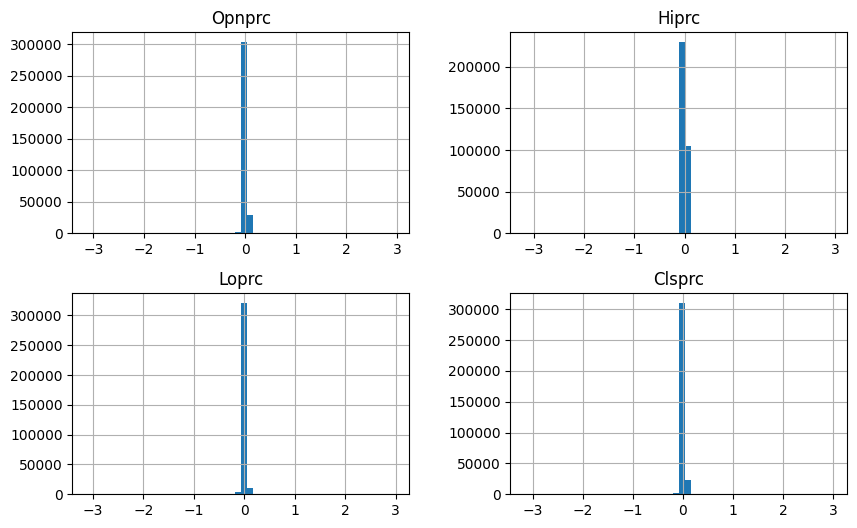

In [44]:
%matplotlib inline
ax = returns.hist(figsize=(10,6),grid=True,bins=50)

In [45]:
returns.corr()

,Opnprc,Hiprc,Loprc,Clsprc
Opnprc,1.000000,0.934436,0.949858,0.869774
Hiprc,0.934436,1.000000,0.943429,0.951667
Loprc,0.949858,0.943429,1.000000,0.939442
Clsprc,0.869774,0.951667,0.939442,1.000000


<module 'matplotlib.pyplot' from 'c:\\Users\\wr\\AppData\\Local\\conda\\conda\\envs\\python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

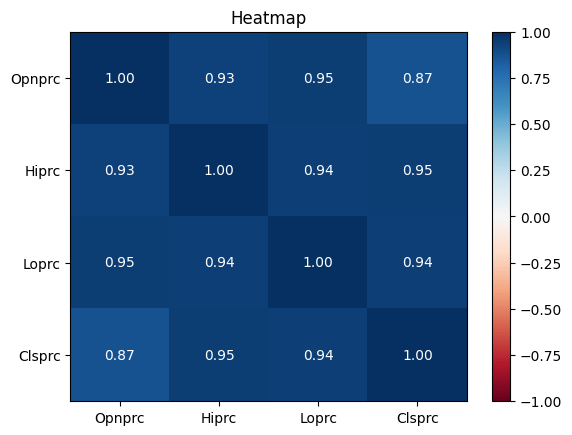

In [46]:
returns.plot_corr_heatmap()

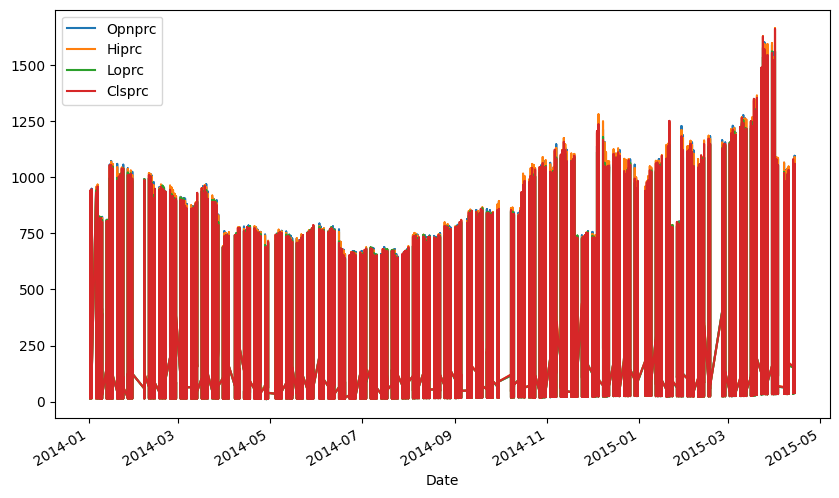

In [47]:
ax2 = stock_price.rebase().plot(figsize=(10,6))

<AxesSubplot: xlabel='date'>

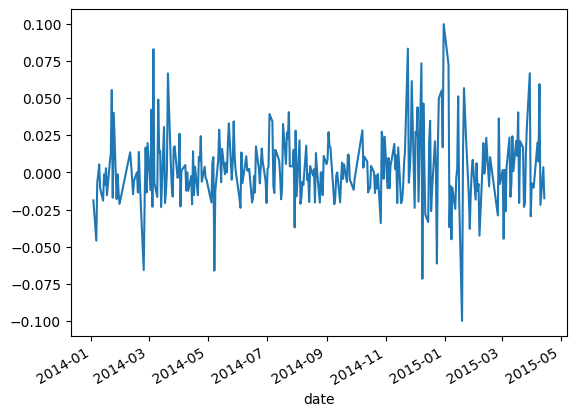

In [51]:
simpleret.plot()

<AxesSubplot: xlabel='date'>

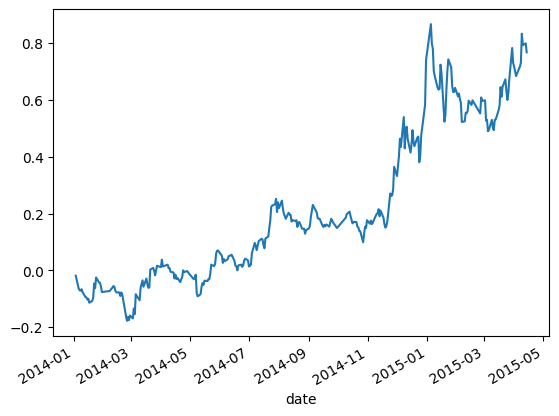

In [52]:
((1+simpleret).cumprod()-1).plot() # 简单收益率累积

In [54]:
SAPower = pd.read_csv('018/SAPower.csv',index_col='Date')
SAPower.index = pd.to_datetime(SAPower.index)
DalianRP = pd.read_csv('018/DalianRP.csv',index_col='Date')
DalianRP.index = pd.to_datetime(DalianRP.index)
returnS = ffn.to_returns(SAPower.Close)
returnD = ffn.to_returns(DalianRP.Close)

In [56]:
print(returnS.std()) # 标准差衡量风险
print(returnD.std())

0.041511404614033375
0.020319411733180383


In [65]:
# downside risk
# MARR: minimum acceptable rate of return
def downside_risk(returns,MARR):
    return np.sqrt(np.mean(np.minimum(returns-MARR,0)**2))


In [66]:
downside_risk(returnS,returnS.mean())

0.03559345345188916

In [67]:
downside_risk(returnD,returnD.mean())

0.0136997096838761

风险价值 VaR(通常要把它化成正数)


$\operatorname{Pr}\left\{X_t<-\operatorname{VaR}(\alpha, \Delta t)\right\}=\alpha \%$

In [68]:
# 历史模拟法
returnS.quantile(0.05)

-0.043192456894806296

In [69]:
returnD.quantile(0.05)

-0.03408596308105866

In [70]:
# 协方差矩阵法
from scipy.stats import norm
def VaR_cov(returns,confidence_level):
    alpha = norm.ppf(confidence_level,returns.mean(),returns.std()) # 正态分布的逆函数
    return -alpha
VaR_cov(returnS,0.05)

0.06621086216022148

In [71]:
VaR_cov(returnD,0.05)

0.03274944602236822

In [75]:
# 期望亏空
def ES_quantile(returns,confidence_level):
    return returns[returns<returns.quantile(confidence_level)].mean()
def ES_cov(returns,confidence_level):
    return returns[returns<(-VaR_cov(returns,confidence_level))].mean()

In [77]:
ES_quantile(returnS,0.05)
ES_quantile(returnD,0.05)

-0.04536728238570146

In [78]:
import datetime

In [80]:
r = pd.Series([0,0.1,-0.1,-0.01,0.01,0.02],index=[datetime.date(2015,7,x) for x in range(3,9)])

In [81]:
r

2015-07-03    0.00
2015-07-04    0.10
2015-07-05   -0.10
2015-07-06   -0.01
2015-07-07    0.01
2015-07-08    0.02
dtype: float64

In [83]:
value = (1+r).cumprod() # 累积收益率
value

2015-07-03    1.000000
2015-07-04    1.100000
2015-07-05    0.990000
2015-07-06    0.980100
2015-07-07    0.989901
2015-07-08    1.009699
dtype: float64

In [84]:
D = value.cummax() - value # 回撤
d = D/(D + value) # 回撤率
print(D)

2015-07-03    0.000000
2015-07-04    0.000000
2015-07-05    0.110000
2015-07-06    0.119900
2015-07-07    0.110099
2015-07-08    0.090301
dtype: float64


In [85]:
MDD = D.max() # 最大回撤
MDD

0.1199

In [87]:
mdd = d.max() # 最大回撤率
mdd

0.109

In [88]:
ffn.calc_max_drawdown(value)

-0.10899999999999999

In [89]:
def MDD(returns): # 自定义计算最大回撤率
    value = (1+returns).cumprod()
    D = value.cummax() - value
    d = D/(D + value)
    mdd = d.max()
    return -mdd

In [90]:
MDD(r)

-0.109

In [91]:
ffn.calc_max_drawdown((1+returnS).cumprod())

-0.5676392572944298

In [92]:
MDD(returnS)

-0.5676392572944298

In [101]:
import efinance as ef # 金融数据包
stock = ef.stock.get_quote_history('000001',beg='20140101',end='20141231',klt=101)
stock.head()

,股票名称,股票代码,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,平安银行,000001,2014-01-02,5.61,5.67,5.71,5.57,489911,596223744.0,2.46,-0.18,-0.01,0.88
1,平安银行,000001,2014-01-03,5.63,5.50,5.63,5.41,551115,656631296.0,3.88,-3.00,-0.17,0.99
2,平安银行,000001,2014-01-06,5.47,5.35,5.54,5.25,582118,679280384.0,5.27,-2.73,-0.15,1.04
3,平安银行,000001,2014-01-07,5.27,5.32,5.40,5.25,338407,393977584.0,2.80,-0.56,-0.03,0.61
4,平安银行,000001,2014-01-08,5.33,5.40,5.51,5.27,457768,538436176.0,4.51,1.50,0.08,0.82


In [105]:
close = stock.loc[:,['收盘']]
close.head()

,收盘
0,5.67
1,5.50
2,5.35
3,5.32
4,5.40


In [107]:
close.index = pd.to_datetime(stock.日期)

In [108]:
close.head()

,收盘
日期,
2014-01-02,5.67
2014-01-03,5.50
2014-01-06,5.35
2014-01-07,5.32
2014-01-08,5.40


Text(0, 0.5, 'Simple Return')

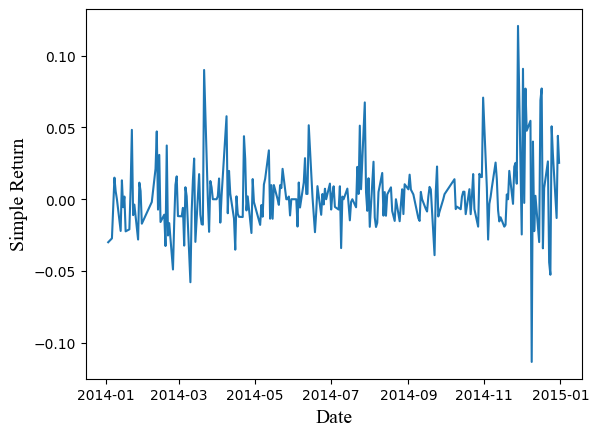

In [119]:
ret = ffn.to_returns(close) # 计算简单收益率
plt.plot(ret)
plt.xlabel("Date",fontproperties='Times New Roman',fontsize=14)
plt.ylabel("Simple Return",fontproperties='Times New Roman',fontsize=14)


In [120]:
def cumulative_return(price):
    return_rate = (price - price.shift(1))/price.shift(1)
    return (1+return_rate).cumprod()-1

Text(0, 0.5, 'Cumulative Return')

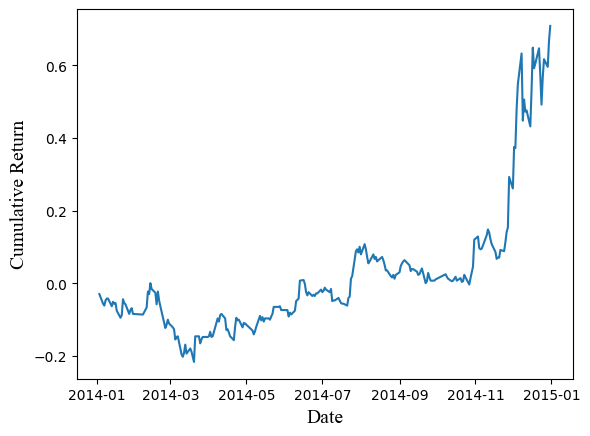

In [123]:
cum = cumulative_return(close)
plt.plot(cum)
plt.xlabel("Date",fontproperties='Times New Roman',fontsize=14)
plt.ylabel("Cumulative Return",fontproperties='Times New Roman',fontsize=14)

In [125]:
import tushare as ts
import matplotlib
#指定默认字体  
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='Times New Roman'  
#解决负号'-'显示为方块的问题  
matplotlib.rcParams['axes.unicode_minus'] = False 

In [129]:
pro = ts.pro_api('b503861f676508cb9abf2166548ca8dbe7885970e633aae3ffab2889') # 申请token

df = pro.daily(ts_code='600519.SH', start_date='20190101', end_date='20210220')
stock = df.set_index(["trade_date"])
stock.head(10)


,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20210219,600519.SH,2451.16,2496.66,2381.6,2460.00,2471.00,-11.00,-0.4452,59385.46,1.452516e+07
20210218,600519.SH,2587.98,2627.88,2465.0,2471.00,2601.00,-130.00,-4.9981,65912.32,1.670414e+07
20210210,600519.SH,2485.00,2601.20,2485.0,2601.00,2456.43,144.57,5.8854,61370.57,1.567593e+07
20210209,600519.SH,2368.80,2456.43,2350.0,2456.43,2368.80,87.63,3.6993,33296.55,7.972930e+06
20210208,600519.SH,2337.00,2378.88,2313.0,2368.80,2313.00,55.80,2.4125,35785.73,8.420759e+06
20210205,600519.SH,2325.00,2364.60,2291.0,2313.00,2320.85,-7.85,-0.3382,39729.06,9.253566e+06
20210204,600519.SH,2191.00,2330.00,2191.0,2320.85,2189.91,130.94,5.9792,63851.01,1.459693e+07
20210203,600519.SH,2150.00,2198.27,2140.0,2189.91,2145.00,44.91,2.0937,38714.15,8.384049e+06
20210202,600519.SH,2112.22,2149.99,2102.1,2145.00,2109.32,35.68,1.6915,34582.25,7.372234e+06


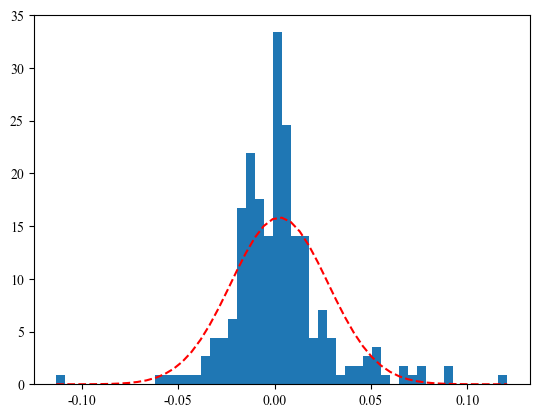

In [135]:
n,bins,patches = plt.hist(ret,density=True,bins=50)
# 正态分布拟合曲线
from scipy.stats import norm
y = norm.pdf(bins,ret.mean(),ret.std())
plt.plot(bins,y,'r--')


In [167]:
stocks = pd.read_table('019/stock.txt',sep='\t',index_col='Trddt')
fjgs = stocks.loc[stocks.Stkcd==600033,'Dretwd']
fjgs.name = 'fjgs'
zndl = stocks.loc[stocks.Stkcd==600023,'Dretwd']
zndl.name = 'zndl'
sykj = stocks.loc[stocks.Stkcd==600183,'Dretwd']
sykj.name = 'sykj'
hxyh = stocks.loc[stocks.Stkcd==600015,'Dretwd']
hxyh.name = 'hxyh'
byjc = stocks.loc[stocks.Stkcd==600004,'Dretwd']
byjc.name = 'byjc'
sh_return = pd.concat([byjc,fjgs,hxyh,sykj,zndl],axis=1)

In [168]:
sh_return.head()

,byjc,fjgs,hxyh,sykj,zndl
Trddt,,,,,
2014/1/2,-0.001439,0.000000,-0.031505,0.002024,0.008876
2014/1/3,-0.008646,0.004673,-0.028916,-0.012121,-0.013196
2014/1/6,-0.018895,-0.023256,-0.023573,-0.026585,0.005944
2014/1/7,-0.007407,0.004762,-0.003812,0.021008,-0.013294
2014/1/8,0.005970,-0.014218,0.021684,-0.014403,0.008982


In [169]:
sh_return = sh_return.dropna()

Text(0.5, 1.0, 'daily return of 5 stocks')

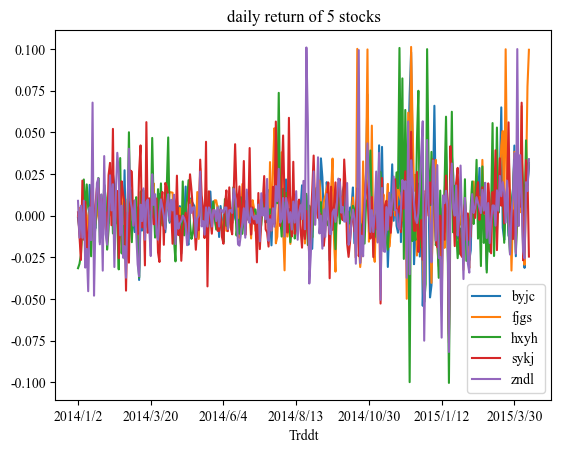

In [147]:
cum_return = (1+sh_return).cumprod()-1
sh_return.plot()
plt.title('daily return of 5 stocks')


<AxesSubplot: xlabel='Trddt'>

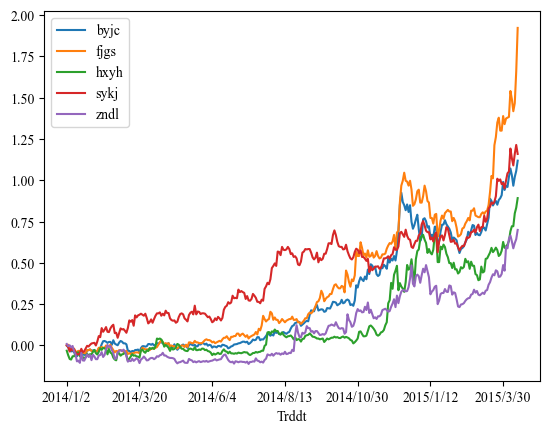

In [148]:
cum_return.plot()

In [195]:
def markowitz(returns,num_assets,num_tests): # 马科维茨投资组合
    portfolio_returns = []
    portfolio_volatilities = []
    cov_matrix = returns.cov()
    returns2 = np.array(returns)
    for i in range(num_tests):
        weights = np.random.random(num_assets).reshape(-1,1)
        weights /= np.sum(weights)
        portfolio_returns.append(np.mean(returns2.dot(weights)))
        portfolio_volatilities.append((np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights))))[0,0])
    plt.plot(portfolio_volatilities,portfolio_returns,'o',markersize=2)
    plt.xlabel('expected volatility')
    plt.ylabel('expected return')
    plt.title('Markowitz portfolio simulation')
    return portfolio_returns,portfolio_volatilities


In [243]:
np.array(sh_return.cov())

array([[3.31222346e-04, 2.33495562e-04, 1.30503165e-04, 1.27979074e-04,
        1.69397787e-04],
       [2.33495562e-04, 4.70189671e-04, 1.33865468e-04, 1.48118543e-04,
        1.86703066e-04],
       [1.30503165e-04, 1.33865468e-04, 4.78876208e-04, 8.58797432e-05,
        1.74951914e-04],
       [1.27979074e-04, 1.48118543e-04, 8.58797432e-05, 3.57163767e-04,
        1.23922567e-04],
       [1.69397787e-04, 1.86703066e-04, 1.74951914e-04, 1.23922567e-04,
        4.68761355e-04]])

[2 3 4 5 6]
   a  b
0  1  2
1  2  3
2  3  4
3  4  5
4  5  6 (5, 2)


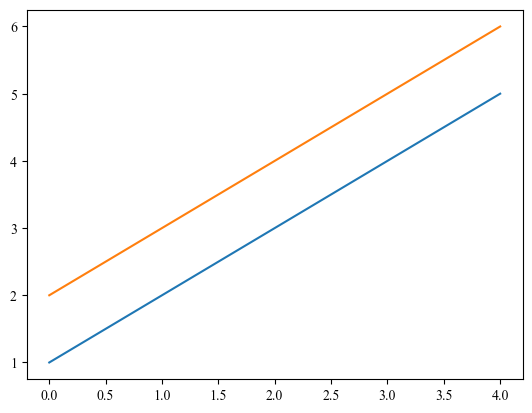

In [278]:
a = np.array([1,2,3,4,5])
b = (a+1).copy()
print(b)
np.argmax(b)
c = pd.DataFrame({'a':a,'b':b})
print(c,c.shape)
c[c['a']>2]
plt.plot(c)

In [286]:
class Markowitz_portfolio: # 马科维茨投资组合
    def __init__(self,returns):
        self.returns = np.array(returns)
        self.num_assets = self.returns.shape[1]
        self.cov_matrix = np.array(returns.cov())
        self.mean_matrix = np.mean(self.returns,axis=0).reshape(-1,1)
    def simulation(self,num_tests):
        portfolio_returns = []
        portfolio_volatilities = []
        for i in range(num_tests):
            weights = np.random.random(self.num_assets).reshape(-1,1)
            weights /= np.sum(weights)
            portfolio_returns.append(np.mean(self.returns.dot(weights)))
            portfolio_volatilities.append((np.sqrt(np.dot(weights.T,np.dot(self.cov_matrix,weights))))[0,0])
        return portfolio_returns,portfolio_volatilities
    def draw_simulation(self,num_tests):
        portfolio_returns,portfolio_volatilities = self.simulation(num_tests)
        plt.plot(portfolio_volatilities,portfolio_returns,'o',markersize=2)
        plt.xlabel('expected volatility')
        plt.ylabel('expected return')
        plt.title('Markowitz portfolio')
    def cal_min_variance(self,expected_return):
        a = (self.mean_matrix).T.dot(np.linalg.inv(self.cov_matrix)).dot(self.mean_matrix)
        b = (self.mean_matrix).T.dot(np.linalg.inv(self.cov_matrix)).dot(np.ones((self.num_assets,1)))
        c = np.ones((self.num_assets,1)).T.dot(np.linalg.inv(self.cov_matrix)).dot(np.ones((self.num_assets,1)))
        sigma = np.sqrt((c*expected_return**2 - 2*b*expected_return + a)/(a*c-b**2))[0,0]
        return sigma
    def draw_efficient_frontier_formula(self,return_range):
        min_variances = []
        expected_returns = return_range.copy()
        for expected_return in return_range:
            min_variances.append(self.cal_min_variance(expected_return))
        return_variance = pd.DataFrame({'return':expected_returns, 'variance':min_variances})
        min_index = np.argmin(min_variances)
        new_matrix = return_variance[return_variance['return'] > expected_returns[min_index]]
        plt.plot(new_matrix['variance'],new_matrix['return'],'r-')
        plt.xlabel('expected volatility')
        plt.ylabel('expected return')
        plt.title('Markowitz portfolio')
    def optimal_portfolio(self):
        import cvxopt as opt
        from cvxopt import blas, solvers
        solvers.options['show_progress'] = False  # 关闭cvxopt日志
        n = self.num_assets
        returns = np.asmatrix(self.returns.T) # 原先是竖的，转置成横的
        N = 100
        lambdas = [10**(5.0 * t/N - 1.0) for t in range(N)]  # 原参考代码为mus, 此处为了不引起歧义改名
        # 转化为cvxopt matrices
        S = opt.matrix(np.cov(returns))
        ret_vec = opt.matrix(np.mean(returns, axis=1)) # 收益向量
        
        # 约束条件
        G = -opt.matrix(np.eye(n))   # G*x <= h 用于表示约束条件 w0, w1, ... wn >= 0   G: 值为-1的对角矩阵, x: 列向量 h: 列向量0
        h = opt.matrix(0.0, (n ,1))  
        A = opt.matrix(1.0, (1, n))  # A*x = b 用于表示约束条件 w1 + w2 + ... + wn = 1 dim(A): (1, n), dim(b): 标量1
        b = opt.matrix(1.0)
        
        # 使用凸优化计算有效前沿
        portfolios = [solvers.qp(lbd*S, -ret_vec, G, h, A, b)['x'] 
                    for lbd in lambdas]
        ## 计算有效前沿的收益率和风险
        returns = [blas.dot(ret_vec, x) for x in portfolios]
        risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
        m1 = np.polyfit(returns, risks, 2)
        x1 = np.sqrt(m1[2] / m1[0])
        # 计算最优组合
        wt = solvers.qp(opt.matrix(x1 * S), -ret_vec, G, h, A, b)['x']
        return np.asarray(wt), returns, risks
    def draw_optimal_portfolio(self):
        weights, returns, risks = self.optimal_portfolio()
        plt.plot(risks, returns, 'y-o')
        plt.xlabel('expected volatility')
        plt.ylabel('expected return')
        plt.title('Markowitz portfolio')
    def draw_poly(self,return_range):
        portfolio_volatilities = []
        portfolio_returns = return_range.copy()
        for expected_return in return_range:
            portfolio_volatilities.append(self.cal_min_variance(expected_return))
        portfolio_returns = np.array(portfolio_returns)
        portfolio_volatilities = np.array(portfolio_volatilities)
        m1 = np.polyfit(portfolio_returns,portfolio_volatilities, 2)
        plt.plot(m1[0]*portfolio_returns**2+m1[1]*portfolio_returns+m1[2],portfolio_returns,'o',markersize=2)
        plt.xlabel('expected volatility')
        plt.ylabel('expected return')
        plt.title('Markowitz portfolio')


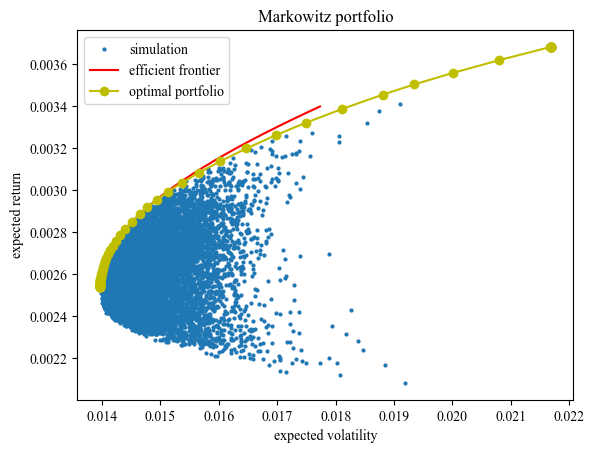

In [288]:
Markowitz_portfolio(sh_return).draw_simulation(10000)
Markowitz_portfolio(sh_return).draw_efficient_frontier_formula(np.arange(0.0010,0.0034,0.000001))
Markowitz_portfolio(sh_return).draw_optimal_portfolio()
#Markowitz_portfolio(sh_return).draw_poly(np.arange(0.0010,0.0034,0.000001))
plt.legend(['simulation','efficient frontier','optimal portfolio'])#,'poly'])

In [205]:
# 书上的代码
from scipy import linalg
class MeanVariance:
    def __init__(self,returns):
        self.returns=returns
    def minVar(self,goalRet):
        covs=np.array(self.returns.cov())
        means=np.array(self.returns.mean())
        L1=np.append(np.append(covs.swapaxes(0,1),[means],0),
                     [np.ones(len(means))],0).swapaxes(0,1)
        L2=list(np.ones(len(means)))
        L2.extend([0,0])
        L3=list(means)
        L3.extend([0,0])
        L4=np.array([L2,L3])
        L=np.append(L1,L4,0)
        results=linalg.solve(L,np.append(np.zeros(len(means)),[1,goalRet],0))
        return(np.array([list(self.returns.columns),results[:-2]]))
    def frontierCurve(self):
        goals=[x/1000000 for x in range(2000,3200)]
        variances=list(map(lambda x: self.calVar(self.minVar(x)[1,:].astype(np.float)),goals))
        plt.plot(variances,goals)
    def meanRet(self,fracs):
        meanRisky=ffn.to_returns(self.returns).mean()
        assert len(meanRisky)==len(fracs), 'Length of fractions must be equal to number of assets'
        return(np.sum(np.multiply(meanRisky,np.array(fracs))))
    def calVar(self,fracs):
        return(np.dot(np.dot(fracs,self.returns.cov()),fracs))

In [289]:
# 凸优化计算实例
from cvxopt import matrix, solvers
myreturn = np.array(sh_return)
print(myreturn)
P = matrix([[4.0,1.0],[1.0,2.0]])
q = matrix([1.0,1.0])
G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([0.0,0.0])
A = matrix([1.0,1.0],(1,2))#原型为cvxopt.matrix(array,dims)，等价于A = matrix([[1.0],[1.0]]）
b = matrix([1.0])
result = solvers.qp(P,q,G,h,A,b)
 
print('x\n',result['x'])

[[-0.001439  0.       -0.031505  0.002024  0.008876]
 [-0.008646  0.004673 -0.028916 -0.012121 -0.013196]
 [-0.018895 -0.023256 -0.023573 -0.026585  0.005944]
 ...
 [ 0.026944  0.020243  0.045129  0.033264  0.020025]
 [ 0.017991  0.077381  0.019191  0.025151  0.014724]
 [ 0.030191  0.099448  0.031607 -0.024534  0.033857]]
x
 [ 2.50e-01]
[ 7.50e-01]



In [210]:
import cvxopt as opt
from cvxopt import blas, solvers

solvers.options['show_progress'] = False  # 关闭cvxopt日志

def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    lambdas = [10**(5.0 * t/N - 1.0) for t in range(N)]  # 原参考代码为mus, 此处为了不引起歧义改名
    
    # 转化为cvxopt matrices
    S = opt.matrix(np.cov(returns))
    ret_vec = opt.matrix(np.mean(returns, axis=1)) # 收益向量
    
    # 约束条件
    G = -opt.matrix(np.eye(n))   # G*x <= h 用于表示约束条件 w0, w1, ... wn >= 0   G: 值为-1的对角矩阵, x: 列向量 h: 列向量0
    h = opt.matrix(0.0, (n ,1))  
    A = opt.matrix(1.0, (1, n))  # A*x = b 用于表示约束条件 w1 + w2 + ... + wn = 1 dim(A): (1, n), dim(b): 标量1
    b = opt.matrix(1.0)
    
    # 使用凸优化计算有效前沿
    portfolios = [solvers.qp(lbd*S, -ret_vec, G, h, A, b)['x'] 
                  for lbd in lambdas]
    ## 计算有效前沿的收益率和风险
    returns = [blas.dot(ret_vec, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # 计算最优组合
    wt = solvers.qp(opt.matrix(x1 * S), -ret_vec, G, h, A, b)['x']
    return np.asarray(wt), returns, risks